In [1]:
import pandas as pd
#from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
#import chardet



import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString

import os


In [2]:
gwd = os.getcwd()
print(gwd)

c:\Users\HP\OneDrive - Universidad del Pacífico\textos\Escritorio\2025-1\Git\PC\PC3


In [3]:
dpt_shp = gpd.read_file(r'C:\Users\HP\OneDrive - Universidad del Pacífico\textos\Escritorio\2025-1\Git\PC\PC3\shape_file\DISTRITOS.shp')

In [4]:
# Mostrar los campos del shapefile
print(dpt_shp.columns)

Index(['IDDPTO', 'DEPARTAMEN', 'IDPROV', 'PROVINCIA', 'IDDIST', 'DISTRITO',
       'CAPITAL', 'CODCCPP', 'AREA', 'FUENTE', 'geometry'],
      dtype='object')


In [5]:
# Mostrar las primeras filas del GeoDataFrame
print(dpt_shp.head())

  IDDPTO DEPARTAMEN IDPROV    PROVINCIA  IDDIST                DISTRITO  \
0     10    HUANUCO   1009  PUERTO INCA  100902         CODO DEL POZUZO   
1     10    HUANUCO   1009  PUERTO INCA  100904             TOURNAVISTA   
2     25    UCAYALI   2503   PADRE ABAD  250305  ALEXANDER VON HUMBOLDT   
3     25    UCAYALI   2503   PADRE ABAD  250302                 IRAZOLA   
4     25    UCAYALI   2503   PADRE ABAD  250304                 NESHUYA   

                  CAPITAL CODCCPP  AREA FUENTE  \
0         CODO DEL POZUZO    0001     1   INEI   
1             TOURNAVISTA    0001     1   INEI   
2  ALEXANDER VON HUMBOLDT    0001     1   INEI   
3           SAN ALEJANDRO    0001     1   INEI   
4            MONTE ALEGRE    0001     1   INEI   

                                            geometry  
0  POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975...  
1  POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...  
2  POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...  
3  POLYGON ((-75.13864 -8.56

In [6]:
dpt_shp.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
final_df = pd.read_excel(r'C:\Users\HP\OneDrive - Universidad del Pacífico\textos\Escritorio\2025-1\Git\PC\PC3\archivo_final.xlsx')
print(final_df.head())


   Código Modular  Anexo     Nombre de SS.EE.  Ubigeo Departamento Provincia  \
0         3947725      0  SEMILLITAS DE JESUS   20101       ANCASH    HUARAZ   
1          723718      0                420-3   20101       ANCASH    HUARAZ   
2         1406321      0        MAGNUS SCHOOL   20101       ANCASH    HUARAZ   
3         1344944      0        MAGNUS SCHOOL   20101       ANCASH    HUARAZ   
4         1310309      0          SANTA ELENA   20101       ANCASH    HUARAZ   

  Distrito  Código DRE/UGEL DRE / UGEL    Centro Poblado  \
0   HUARAZ            20001     HUARAZ    8 DE DICIEMBRE   
1   HUARAZ            20001     HUARAZ  ANTONIO RAIMONDI   
2   HUARAZ            20001     HUARAZ             BELEN   
3   HUARAZ            20001     HUARAZ             BELEN   
4   HUARAZ            20001     HUARAZ             BELEN   

   Código Centro Poblado  Código Local                            Dirección  \
0               655321.0           NaN                       PIEDRAS AZULES   


In [8]:
columnas = [
    "Código Modular",
    "Nombre de SS.EE.",
    "Ubigeo",
    "Departamento",
    "Provincia",
    "Distrito",
    "Centro Poblado",
    "Nivel / Modalidad",
    "Gestion / Dependencia"
]
final_df = final_df[columnas]

In [9]:
#final_df['Ubigeo'].unique() 1891
# dpt_shp['IDDIST'].unique() 1873

In [10]:
gdf_escuelas = pd.DataFrame(final_df).copy()

# Renombrar varias columnas en una sola línea
gdf_escuelas = gdf_escuelas.rename(columns={
    "Distrito": "DISTRITO",
    "Ubigeo": "IDDIST"
})

# Ver las nuevas columnas
print(gdf_escuelas.columns)


Index(['Código Modular', 'Nombre de SS.EE.', 'IDDIST', 'Departamento',
       'Provincia', 'DISTRITO', 'Centro Poblado', 'Nivel / Modalidad',
       'Gestion / Dependencia'],
      dtype='object')


In [11]:
print(gdf_escuelas['Gestion / Dependencia'].unique())
print('----------------')
print(gdf_escuelas['Nivel / Modalidad'].unique())

['Pública - Sector Educación' 'Privada - Particular'
 'Pública - En convenio' 'Privada - Parroquial'
 'Privada - Instituciones Benéficas' 'Pública - Municipalidad'
 'Pública - Otro Sector Público' 'Privada - Comunal'
 'Privada - Cooperativa' 'Privada - Fiscalizada']
----------------
['Inicial No Escolarizado' 'Inicial - Jardín' 'Primaria'
 'Inicial - Cuna Jardín' 'Superior Tecnológica' 'Secundaria'
 'Técnico Productiva - CETPRO' 'Instancia de Apoyo'
 'Superior Formación Artística' 'Básica Alternativa - Avanzado'
 'Básica Alternativa - Inicial e Intermedio' 'Básica Especial - Primaria'
 'Básica Especial - Inicial' 'Básica Especial - PRITE'
 'Superior Pedagógica' 'Escuela Superior Pedagógica' 'Inicial - Cuna'
 'Escuela Superior Tecnológica']


# 🏫 Clasificación de Instituciones Educativas en Perú

| **Categoría** | **Tipo de gestión**         | **Descripción**                                                                                                                                                                                   |
|---------------|-----------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Pública**   | Sector Educación            | Administradas directamente por el Ministerio de Educación o las Direcciones Regionales de Educación. Son gratuitas y constituyen la forma más común de educación pública.                       |
|               | En convenio                 | Instituciones gestionadas por entidades privadas (congregaciones religiosas u ONGs) mediante convenios con el Estado. Ofrecen educación gratuita con financiamiento público.                   |
|               | Municipalidad               | Escuelas gestionadas por gobiernos locales o municipales. La administración depende de la municipalidad correspondiente.                                                                         |
|               | Otro Sector Público         | Instituciones educativas administradas por otras entidades del Estado (Fuerzas Armadas, Policía Nacional, ministerios distintos al de Educación).                                              |
| **Privada**   | Particular                  | Instituciones financiadas y gestionadas completamente por entidades privadas o personas naturales. Su financiamiento proviene de las pensiones que pagan las familias.                       |
|               | Parroquial                  | Escuelas administradas por la Iglesia Católica u otras entidades religiosas. Muchas ofrecen educación a bajo costo o gratuita en zonas de bajos recursos.                                     |
|               | Instituciones Benéficas     | Gestionadas por fundaciones o asociaciones benéficas. Ofrecen educación gratuita o a muy bajo costo a poblaciones vulnerables.                                                                   |
|               | Comunal                     | Instituciones creadas y gestionadas por comunidades locales o asociaciones de padres de familia. Financiamiento y administración comunitarios.                                                  |
|               | Cooperativa                 | Escuelas gestionadas por cooperativas de docentes o padres de familia. Funcionan bajo principios cooperativos en la toma de decisiones y gestión.                                             |
|               | Fiscalizada                 | Instituciones privadas sujetas a supervisión y regulación estatal para asegurar el cumplimiento de estándares educativos.                                                                       |


In [12]:
gdf_escuelas["DISTRITO"] = gdf_escuelas["DISTRITO"].str.upper()
dpt_shp["DISTRITO"] = dpt_shp["DISTRITO"].str.upper()
print(len(gdf_escuelas['IDDIST'].unique()))
print(len(dpt_shp['DISTRITO'].unique()))
print(len(dpt_shp['IDDIST'].unique()))

1891
1721
1873


In [13]:
print("Tipo de IDDIST en gdf_escuelas:", gdf_escuelas['IDDIST'].dtype)
print("Tipo de IDDIST en dpt_shp:", dpt_shp['IDDIST'].dtype)
# Convertir la columna numérica a texto (str)
gdf_escuelas['IDDIST'] = gdf_escuelas['IDDIST'].astype(int)
dpt_shp['IDDIST'] = dpt_shp['IDDIST'].astype(int)
print("Tipo de IDDIST en gdf_escuelas después de la conversión:", gdf_escuelas['IDDIST'].dtype)

Tipo de IDDIST en gdf_escuelas: int64
Tipo de IDDIST en dpt_shp: object
Tipo de IDDIST en gdf_escuelas después de la conversión: int64


## Hacer un mergue por cantidad de colegio segun su ID_distrito 
Primero calculamos la cantidad luego el mergue

In [14]:
dt_inicial = gdf_escuelas[gdf_escuelas['Nivel / Modalidad'].str.contains('Inicial', case=False)]
dt_primaria = gdf_escuelas[gdf_escuelas['Nivel / Modalidad'].str.contains('Primaria', case=False)]
dt_secundaria = gdf_escuelas[gdf_escuelas['Nivel / Modalidad'].str.contains('Secundaria', case=False)]

In [15]:
cantidad_primaria = dt_primaria.groupby('IDDIST').size().reset_index(name='NumEscuelas')
cantidad_inicial = dt_inicial.groupby('IDDIST').size().reset_index(name='NumEscuelas')
cantidad_secundaria = dt_secundaria.groupby('IDDIST').size().reset_index(name='NumEscuelas')
# Merge con el shapefile para obtener la geometría de los distritos


In [16]:
dpt_primaria = dpt_shp.merge(
    cantidad_primaria,
    on='IDDIST',
    how='left'
).fillna({'NumEscuelas': 0})

dpt_inicial = dpt_shp.merge(
    cantidad_inicial,
    on='IDDIST',
    how='left'
).fillna({'NumEscuelas': 0})

dpt_secundaria = dpt_shp.merge(
    cantidad_secundaria,
    on='IDDIST',
    how='left'
).fillna({'NumEscuelas': 0})




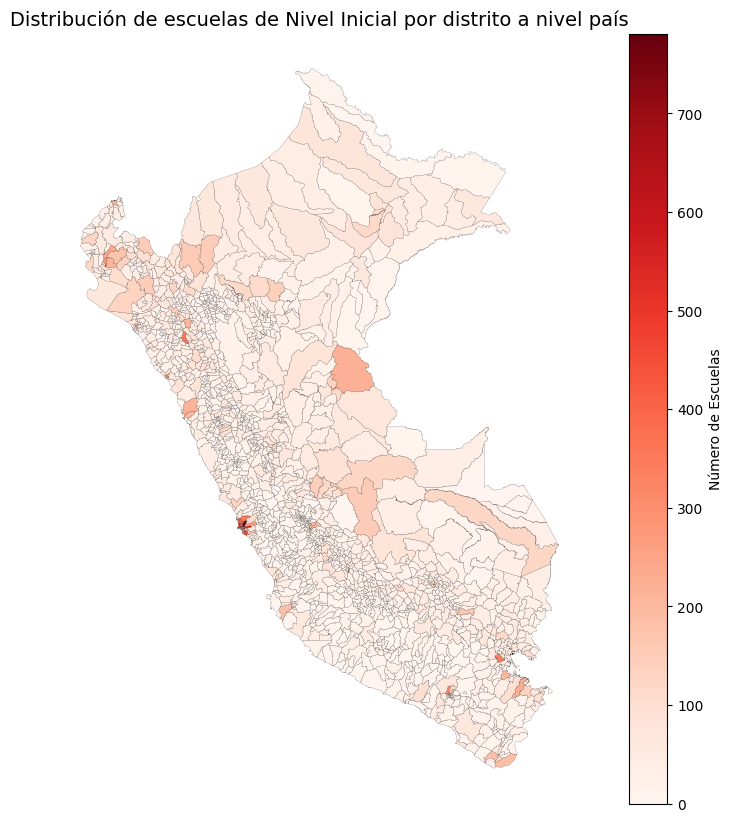

In [28]:
# Nivel inicial
# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Mapa coroplético
dpt_inicial.plot(
    column='NumEscuelas',
    cmap='Reds',
    ax=ax,
    legend=True,
    edgecolor='black',
    linewidth=0.1,
    legend_kwds={'label': "Número de Escuelas"}
)


ax.axis('off')
# Personalización
plt.title('Distribución de escuelas de Nivel Inicial por distrito a nivel país', fontsize=14)
plt.show()

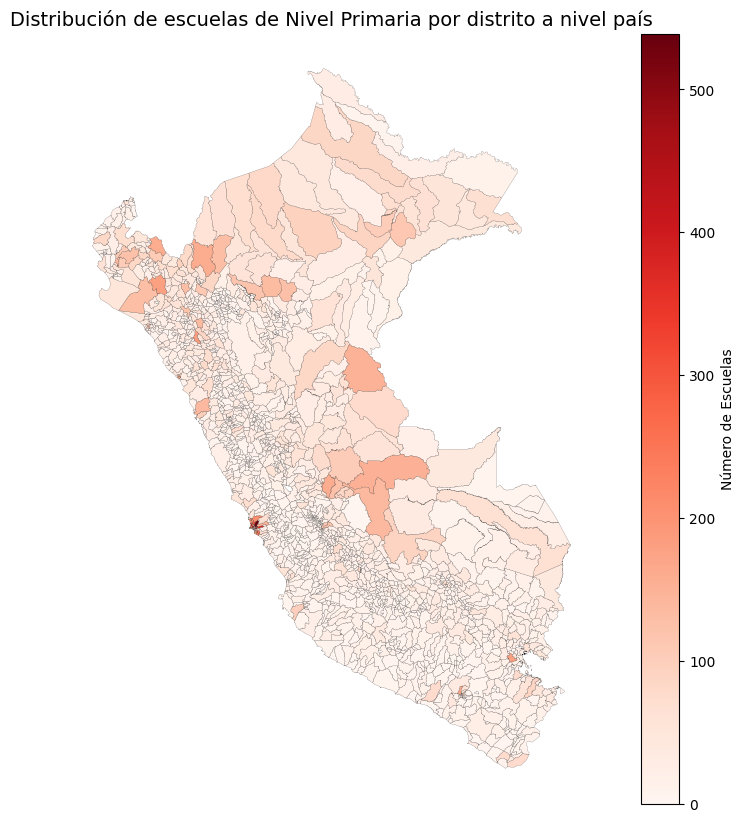

In [29]:
# Nivel primaria
# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Mapa coroplético
dpt_primaria.plot(
    column='NumEscuelas',
    cmap='Reds',
    ax=ax,
    legend=True,
    edgecolor='black',
    linewidth=0.1,
    legend_kwds={'label': "Número de Escuelas"}
)

ax.axis('off')

# Personalización
plt.title('Distribución de escuelas de Nivel Primaria por distrito a nivel país', fontsize=14)
plt.show()

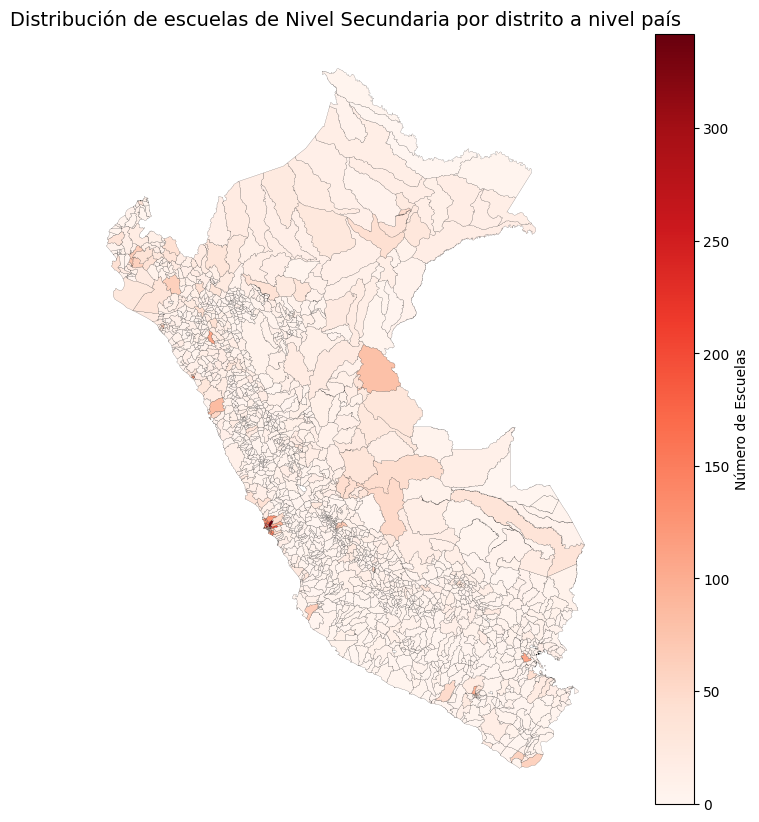

In [27]:
# Nivel Secundaria
# Crear figura
fig, ax = plt.subplots(figsize=(12, 10))

# Mapa coroplético
dpt_secundaria.plot(
    column='NumEscuelas',
    cmap='Reds',
    ax=ax,
    legend=True,
    edgecolor='black',
    linewidth=0.1,
    legend_kwds={'label': "Número de Escuelas"}
)

ax.axis('off')

# Personalización
plt.title('Distribución de escuelas de Nivel Secundaria por distrito a nivel país', fontsize=14)
plt.show()

### Relación entre `IDDPTO` y `DEPARTAMENTO` 

A continuación se muestra la correspondencia única entre los identificadores departamentales (`IDDPTO`) y los nombres de los departamentos (`DEPARTAMEN`):



| IDDPTO | DEPARTAMEN     | IDDPTO | DEPARTAMEN     |
|--------|----------------|--------|----------------|
| 01     | AMAZONAS       | 14     | LAMBAYEQUE     |
| 02     | ÁNCASH         | 15     | LIMA           |
| 03     | APURÍMAC       | 16     | LORETO         |
| 04     | AREQUIPA       | 17     | MADRE DE DIOS  |
| 05     | AYACUCHO       | 18     | MOQUEGUA       |
| 06     | CAJAMARCA      | 19     | PASCO          |
| 07     | CALLAO         | 20     | PIURA          |
| 08     | CUSCO          | 21     | PUNO           |
| 09     | HUANCAVELICA   | 22     | SAN MARTÍN     |
| 10     | HUÁNUCO        | 23     | TACNA          |
| 11     | ICA            | 24     | TUMBES         |
| 12     | JUNÍN          | 25     | UCAYALI        |
| 13     | LA LIBERTAD    |        |                |


**Nota**: Para los códigos de departamentos de un solo dígito, asegúrate de anteponer un cero (por ejemplo, `01`, `02`, ..., `09`) para mantener el formato consistente de dos dígitos.




In [20]:
# SEGUNDA PARTE---------------
# Uso de la librería folium para crear un mapa interactivo 
# Depatamento de Huancavelica y Ayacucho
# Huancavelica: 09
# Ayacucho: 05